In [4]:
import tensorflow as tf

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[]


In [6]:
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data_dir = 'img'

In [8]:
image_exts = ['jpeg','jpg','bmp','png']

In [9]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
print("Deleted unwanted files successfully")

cat
dog
Deleted unwanted files successfully


DISPLAY THE IMAGES

In [10]:
img = cv2.imread(os.path.join('img','cat','cat1.jpg'))

In [11]:
img.shape

(354, 630, 3)

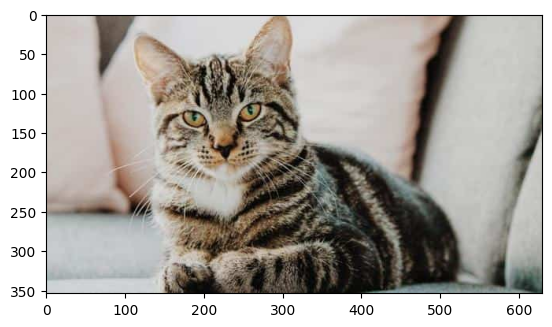

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
data = tf.keras.utils.image_dataset_from_directory('img', batch_size = 8, image_size = (128, 128))

#Total files = 212 + 100 = 312
#Batch size = 8
#Hence length of data var = 312 / 8 = 39

data_iterator = data.as_numpy_iterator()

Found 312 files belonging to 2 classes.


In [14]:
batch = data_iterator.next()
len(batch)

2

In [15]:
batch[0].shape

(8, 128, 128, 3)

In [16]:
list(enumerate(batch[0][:4]))

[(0,
  array([[[183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          ...,
          [190.03996, 197.03996, 189.03996],
          [190.91508, 197.91508, 189.91508],
          [191.     , 198.     , 190.     ]],
  
         [[183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          ...,
          [191.13672, 198.13672, 190.13672],
          [192.     , 199.     , 191.     ],
          [192.13672, 199.13672, 191.13672]],
  
         [[183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          [183.     , 190.     , 183.     ],
          ...,
          [192.89453, 199.89453, 191.89453],
          [193.75781, 200.75781, 192.75781],
          [193.89453, 200.89453, 192.89453]],
  
         ...,
  
         [[186.     , 193.     , 185.     ],
          [186.     , 193.     , 185.     ],
          [186.     ,

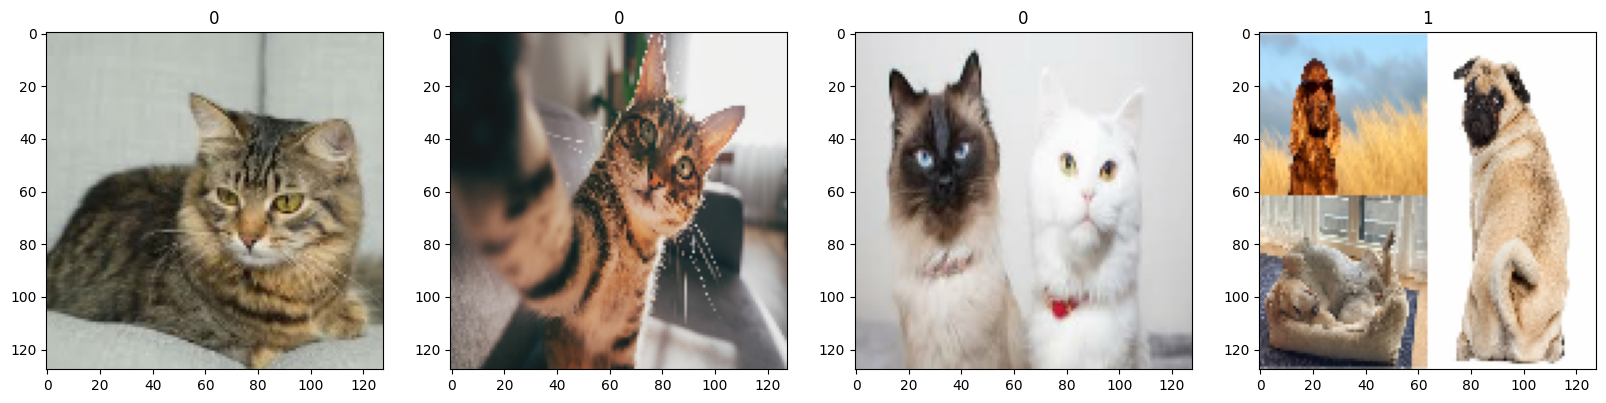

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

SCALING DATAS

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()[0].max()

1.0

SPLIT DATA

In [20]:
len(data)

39

In [21]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)+1
test_size = int(len(data) * 0.1)+1

In [22]:
train_size + val_size + test_size

39

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [24]:
print("Train size: {}\n Val size : {}\n Test size: {}".format(len(train),len(val),len(test)))

Train size: 27
 Val size : 8
 Test size: 4


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu' ))
model.add(Dense(1, activation='sigmoid' ))

In [28]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
27/27 [==============================] - 5s 125ms/step - loss: 0.7235 - accuracy: 0.5880 - val_loss: 0.6529 - val_accuracy: 0.6250
Epoch 2/20
27/27 [==============================] - 3s 105ms/step - loss: 0.6724 - accuracy: 0.6806 - val_loss: 0.6297 - val_accuracy: 0.7344
Epoch 3/20
27/27 [==============================] - 3s 101ms/step - loss: 0.6372 - accuracy: 0.6667 - val_loss: 0.5489 - val_accuracy: 0.7188
Epoch 4/20
27/27 [==============================] - 3s 100ms/step - loss: 0.5936 - accuracy: 0.6991 - val_loss: 0.5709 - val_accuracy: 0.7188
Epoch 5/20
27/27 [==============================] - 3s 98ms/step - loss: 0.5534 - accuracy: 0.7315 - val_loss: 0.5125 - val_accuracy: 0.7344
Epoch 6/20
27/27 [==============================] - 3s 101ms/step - loss: 0.5211 - accuracy: 0.7407 - val_loss: 0.4590 - val_accuracy: 0.8438
Epoch 7/20
27/27 [==============================] - 3s 97ms/step - loss: 0.4350 - accuracy: 0.8056 - val_loss: 0.4251 - val_accuracy: 0.8281
Epoch 8/

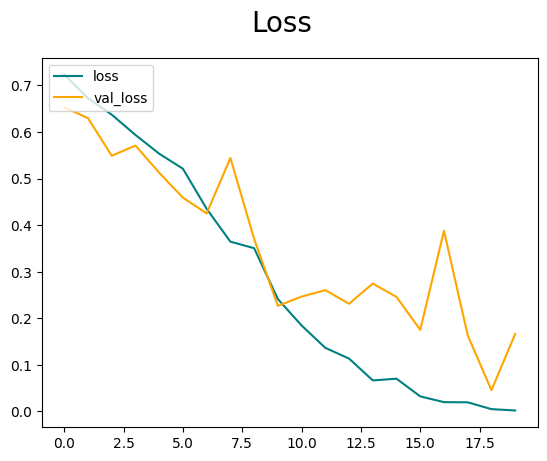

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

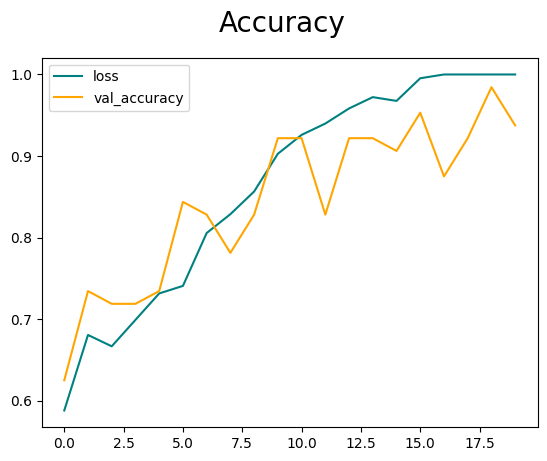

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
len(test)

4

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 49ms/step


In [39]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8461538553237915, Recall:0.8461538553237915, Accuracy: 0.875


In [40]:
import cv2

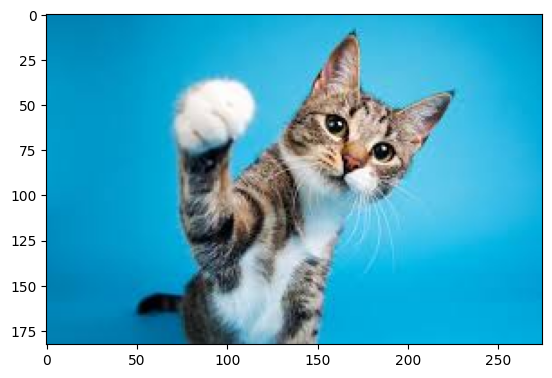

In [41]:
img = cv2.imread('CatImg.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

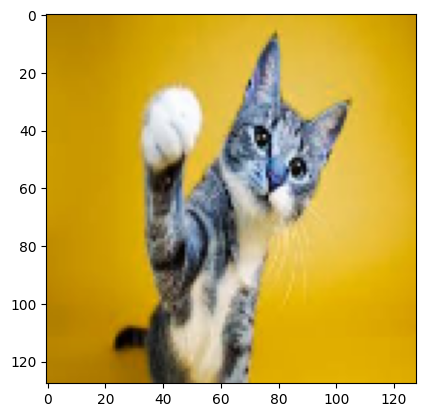

In [42]:
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
np.expand_dims(resize,0).shape

(1, 128, 128, 3)

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 33ms/step


In [47]:
yhat[0,0]

0.00034652685

In [48]:
if(yhat > 0.5):
    print("Input image is cat")
else:
    print("Input image is dog")

Input image is dog
